In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57826 entries, 0 to 57825
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57501 non-null  object 
 1   continent                           57176 non-null  object 
 2   location                            57826 non-null  object 
 3   date                                57826 non-null  object 
 4   total_cases                         54188 non-null  float64
 5   new_cases                           56898 non-null  float64
 6   new_cases_smoothed                  56084 non-null  float64
 7   total_deaths                        44761 non-null  float64
 8   new_deaths                          56898 non-null  float64
 9   new_deaths_smoothed                 56084 non-null  float64
 10  total_cases_per_million             53899 non-null  float64
 11  new_cases_per_million               56834

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [5]:
import matplotlib.pylab as plt

In [6]:
#I wanted to see what the *_smokers table looked like.
df.female_smokers.unique()

array([   nan,  7.1  ,  0.7  , 29.   , 16.2  ,  1.5  , 13.   , 28.4  ,
        0.3  ,  3.1  ,  5.8  ,  1.   ,  1.9  , 10.5  , 25.1  ,  0.6  ,
       30.2  ,  5.7  , 10.1  ,  2.   , 30.1  ,  1.6  , 12.   ,  2.1  ,
       34.2  ,  4.7  ,  4.4  ,  1.7  ,  6.4  , 34.3  , 17.1  , 19.6  ,
       30.5  , 19.3  ,  8.5  ,  0.2  ,  2.5  , 24.5  ,  0.4  , 10.2  ,
       18.3  ,  5.3  , 28.2  , 35.3  ,  2.9  , 26.8  , 14.3  ,  2.8  ,
        0.8  , 23.   , 15.4  , 19.8  , 11.2  ,  7.   ,  1.2  ,  2.7  ,
        3.6  ,  7.3  , 25.6  , 26.9  , 21.3  , 20.9  ,  3.2  ,  6.9  ,
        5.9  ,  5.5  , 44.   ,  5.1  ,  6.3  ,  9.7  ,  9.5  , 24.4  ,
       14.8  ,  0.1  ,  0.5  ,  2.4  , 23.5  ,  5.   ,  4.8  ,  7.8  ,
       23.3  , 16.3  , 22.9  , 23.4  ,  1.8  , 37.7  ,  8.8  ,  5.2  ,
       23.1  , 20.1  ,  8.1  ,  6.2  , 27.4  ,  7.4  , 18.8  , 22.6  ,
        3.3  ,  0.9  ,  1.1  , 14.1  ,  3.4  , 13.5  , 20.   , 19.1  ,
       14.   ,  1.3  ,  7.6  ,  6.434])

In [7]:
#This was a test to see if it would print multiple one after another...it would not.
df[df.location == "United States"][["female_smokers" , "male_smokers"]].value_counts();
#df[df.location == "Chile"][["female_smokers" , "male_smokers"]].value_counts();

In [8]:
df[df.location == "Croatia"][["female_smokers" , "male_smokers"]].value_counts()

female_smokers  male_smokers
34.3            39.9            325
dtype: int64

In [9]:
#i tried this command to see if I could get each countries to no avail.
#df[df.location.unique()][["female_smokers" , "male_smokers"]].value_counts();

In [10]:
"""
I looked up data from https://worldpopulationreview.com/country-rankings/smoking-rates-by-country whos data is provided by https://www.who.int/gho/tobacco/use/en/.
To find the countries that smoke the most and see if they have a higer number of covid smokers. 
Country Total Smoking Rate Male Smoking Rate Female Smoking Rate
Kiribati	52.40%	63.90%	40.90% (not in location.unique)
Nauru	47.50%	43.00%	52.00% (not in location.unique)
Greece	42.65%	52.60%	32.70%
Serbia	41.65%	43.60%	39.70%
Russia	40.90%	59.00%	22.80%
Jordan	40.45%	70.20%	10.70%
Indonesia	39.90%	76.20%	3.60%
Bosnia And Herzegovina	38.60%	47.20%	30.00%
Lebanon	38.20%	45.40%	31.00%
Chile	38.00%	40.00%	36.00%
Latvia	36.60%	48.90%	24.30%
Croatia	36.45%	39.40%	33.50%

This is to get a ratio of smoking population to covid case smokers.
"""

'\nI looked up data from https://worldpopulationreview.com/country-rankings/smoking-rates-by-country whos data is provided by https://www.who.int/gho/tobacco/use/en/.\nTo find the countries that smoke the most and see if they have a higer number of covid smokers. \nCountry Total Smoking Rate Male Smoking Rate Female Smoking Rate\nKiribati\t52.40%\t63.90%\t40.90% (not in location.unique)\nNauru\t47.50%\t43.00%\t52.00% (not in location.unique)\nGreece\t42.65%\t52.60%\t32.70%\nSerbia\t41.65%\t43.60%\t39.70%\nRussia\t40.90%\t59.00%\t22.80%\nJordan\t40.45%\t70.20%\t10.70%\nIndonesia\t39.90%\t76.20%\t3.60%\nBosnia And Herzegovina\t38.60%\t47.20%\t30.00%\nLebanon\t38.20%\t45.40%\t31.00%\nChile\t38.00%\t40.00%\t36.00%\nLatvia\t36.60%\t48.90%\t24.30%\nCroatia\t36.45%\t39.40%\t33.50%\n\nThis is to get a ratio of smoking population to covid case smokers.\n'

In [11]:
#This will give me the percentage of smokers for the selected country
df[df.location == "Greece"][["female_smokers" , "male_smokers"]].value_counts()

female_smokers  male_smokers
35.3            52.0            325
dtype: int64

In [12]:
#This will give me the max cases for the selected country
df[df.location == "Greece"].total_cases.max()

82034.0

In [13]:
df[df.location == "Serbia"][["female_smokers" , "male_smokers"]].value_counts()

female_smokers  male_smokers
37.7            40.2            268
dtype: int64

In [14]:
df[df.location == "Serbia"].total_cases.max()

97988.0

In [15]:
df[df.location == "Russia"][["female_smokers" , "male_smokers"]].value_counts()

female_smokers  male_smokers
23.4            58.3            325
dtype: int64

In [16]:
df[df.location == "Russia"].total_cases.max()

2015608.0

In [17]:
df[df.location == "Jordan"][["female_smokers" , "male_smokers"]].value_counts()

Series([], dtype: int64)

In [18]:
df[df.location == "Jordan"].total_cases.max()

163926.0

In [19]:
df[df.location == "Indonesia"][["female_smokers" , "male_smokers"]].value_counts()

female_smokers  male_smokers
2.8             76.1            325
dtype: int64

In [20]:
df[df.location == "Indonesia"].total_cases.max()

478720.0

In [21]:
df[df.location == "Bosnia and Herzegovina"][["female_smokers" , "male_smokers"]].value_counts()

female_smokers  male_smokers
30.2            47.7            254
dtype: int64

In [22]:
df[df.location == "Bosnia and Herzegovina"].total_cases.max()

75577.0

In [23]:
df[df.location == "Lebanon"][["female_smokers" , "male_smokers"]].value_counts()

female_smokers  male_smokers
26.9            40.7            325
dtype: int64

In [24]:
df[df.location == "Lebanon"].total_cases.max()

110037.0

In [25]:
df[df.location == "Chile"][["female_smokers" , "male_smokers"]].value_counts()

female_smokers  male_smokers
34.2            41.5            260
dtype: int64

In [26]:
df[df.location == "Chile"].total_cases.max()

534558.0

In [27]:
df[df.location == "Latvia"][["female_smokers" , "male_smokers"]].value_counts()

female_smokers  male_smokers
25.6            51.0            269
dtype: int64

In [28]:
df[df.location == "Latvia"].total_cases.max()

11356.0

In [29]:
df[df.location == "Croatia"][["female_smokers" , "male_smokers"]].value_counts()

female_smokers  male_smokers
34.3            39.9            325
dtype: int64

In [30]:
df[df.location == "Croatia"].total_cases.max()

90715.0

(0.0, 100.0)

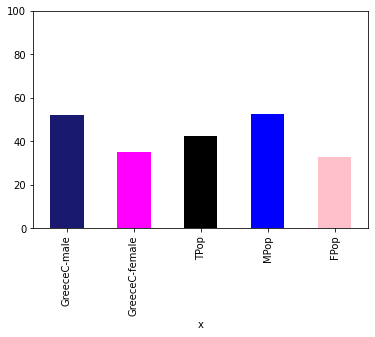

In [31]:
#This is going to graph the percentage of <country>-Coronia virus smoker percentage (C) , TotalPop of smokers percentage, MalePop smokers percetage and FemalePop smokers percentage.
ax = pd.DataFrame({
    "x": ["GreeceC-male" , "GreeceC-female" , "TPop" , "MPop" , "FPop"],
    "y": [52.0, 35.3, 42.65, 52.60, 32.70]
}).plot.bar(x="x" , y="y", legend=False, color=['midnightblue', 'fuchsia', 'black', 'b', 'pink'])
ax.set_ylim(0, 100)

In [32]:
#This will show the ratio of cases to smokers from a predicted standpoint to an actual.
print("GREECE")
MpopPredicted = 23060 * .639
print("MpopPredicted:")
print(MpopPredicted)
FpopPredicted = 23060 * .409
print("FpopPredicted:")
print(FpopPredicted)
GreeceCmale = 23060 * .52
print("GreeceCmale:")
print(GreeceCmale)
GreeceCfemale = 23060 * .353
print("GreeceCfemale:")
print(GreeceCfemale)

GREECE
MpopPredicted:
14735.34
FpopPredicted:
9431.539999999999
GreeceCmale:
11991.2
GreeceCfemale:
8140.179999999999


(0.0, 100.0)

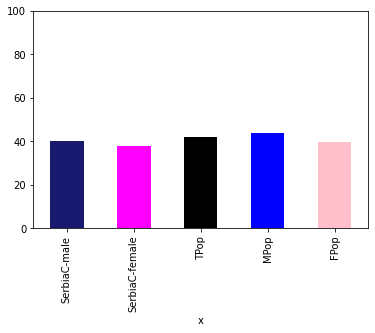

In [33]:
ax = pd.DataFrame({
    "x": ["SerbiaC-male" , "SerbiaC-female" , "TPop" , "MPop" , "FPop"],
    "y": [40.2, 37.7, 41.65, 43.6, 39.7]
}).plot.bar(x="x" , y="y", legend=False, color=['midnightblue', 'fuchsia', 'black', 'b', 'pink'])
ax.set_ylim(0, 100)

In [34]:
print("SERBIA")
MpopPredicted = 35006 * .436
print("MpopPredicted:")
print(MpopPredicted)
FpopPredicted = 35006 * .397
print("FpopPredicted:")
print(FpopPredicted)
SerbiaCmale = 35006 * .402
print("SerbiaCmale:")
print(SerbiaCmale)
SerbiaCfemale = 35006 * .377
print("SerbiaCfemale:")
print(SerbiaCfemale)

SERBIA
MpopPredicted:
15262.616
FpopPredicted:
13897.382000000001
SerbiaCmale:
14072.412
SerbiaCfemale:
13197.262


(0.0, 100.0)

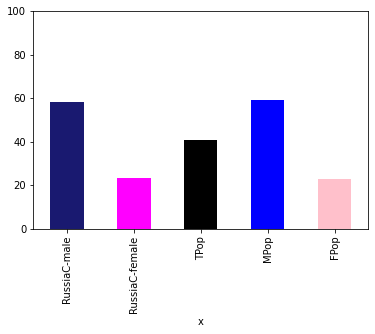

In [35]:
ax = pd.DataFrame({
    "x": ["RussiaC-male" , "RussiaC-female" , "TPop" , "MPop" , "FPop"],
    "y": [58.3, 23.4, 40.9, 59.0, 22.8]
}).plot.bar(x="x" , y="y", legend=False, color=['midnightblue', 'fuchsia', 'black', 'b', 'pink'])
ax.set_ylim(0, 100)

In [36]:
print("RUSSIA")
MpopPredicted = 1326178 * .59
print("MpopPredicted:")
print(MpopPredicted)
FpopPredicted = 1326178* .228
print("FpopPredicted:")
print(FpopPredicted)
RussiaCmale = 1326178 * .583
print("RussiaCmale:")
print(RussiaCmale)
RussiaCfemale = 1326178 * .234
print("RussiaCfemale:")
print(RussiaCfemale)

RUSSIA
MpopPredicted:
782445.0199999999
FpopPredicted:
302368.58400000003
RussiaCmale:
773161.774
RussiaCfemale:
310325.652


(0.0, 100.0)

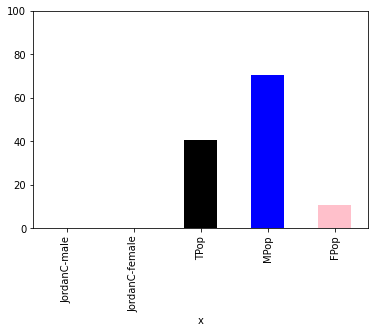

In [37]:
ax = pd.DataFrame({
    "x": ["JordanC-male" , "JordanC-female" , "TPop" , "MPop" , "FPop"],
    "y": [0, 0, 40.45, 70.2, 10.7]
}).plot.bar(x="x" , y="y", legend=False, color=['midnightblue', 'fuchsia', 'black', 'b', 'pink'])
ax.set_ylim(0, 100)

In [38]:
print("JORDAN")
MpopPredicted = 28127 * .702
print("MpopPredicted:")
print(MpopPredicted)
FpopPredicted = 28127 * .107
print("FpopPredicted:")
print(FpopPredicted)
JordanCmale = 28127 * 0
print("JordanCmale:")
print(JordanCmale)
JordanCfemale = 28127 * 0
print("JordanCfemale:")
print(JordanCfemale)

JORDAN
MpopPredicted:
19745.154
FpopPredicted:
3009.589
JordanCmale:
0
JordanCfemale:
0


(0.0, 100.0)

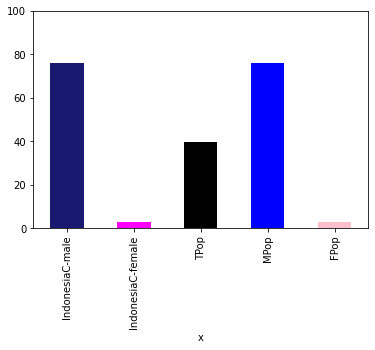

In [39]:
ax = pd.DataFrame({
    "x": ["IndonesiaC-male" , "IndonesiaC-female" , "TPop" , "MPop" , "FPop"],
    "y": [76.1, 2.8, 39.9, 76.1, 2.8]
}).plot.bar(x="x" , y="y", legend=False, color=['midnightblue', 'fuchsia', 'black', 'b', 'pink'])
ax.set_ylim(0, 100)

In [40]:
print("INDONESIA")
MpopPredicted = 340622 * .762
print("MpopPredicted:")
print(MpopPredicted)
FpopPredicted = 340622 * .036
print("FpopPredicted:")
print(FpopPredicted)
IndonesiaCmale = 340622 * .761
print("IndonesiaCmale:")
print(IndonesiaCmale)
IndonesiaCfemale = 340622 * .028
print("IndonesiaCfemale:")
print(IndonesiaCfemale)

INDONESIA
MpopPredicted:
259553.964
FpopPredicted:
12262.392
IndonesiaCmale:
259213.342
IndonesiaCfemale:
9537.416000000001


(0.0, 100.0)

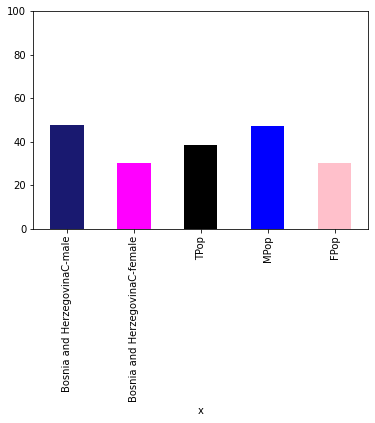

In [41]:
ax = pd.DataFrame({
    "x": ["Bosnia and HerzegovinaC-male" , "Bosnia and HerzegovinaC-female" , "TPop" , "MPop" , "FPop"],
    "y": [47.7, 30.2, 38.6, 47.2, 30.0]
}).plot.bar(x="x" , y="y", legend=False, color=['midnightblue', 'fuchsia', 'black', 'b', 'pink'])
ax.set_ylim(0, 100)

In [42]:
print("INDONESIA")
MpopPredicted = 31173 * .477
print("MpopPredicted:")
print(MpopPredicted)
FpopPredicted = 31173 * .302
print("FpopPredicted:")
print(FpopPredicted)
BosniaandHerzegovinaCmale = 31173 * .472
print("BosniaandHerzegovinaCmale:")
print(BosniaandHerzegovinaCmale)
BosniaandHerzegovinaCfemale = 31173 * .300
print("BosniaandHerzegovinaCfemale:")
print(BosniaandHerzegovinaCfemale)

INDONESIA
MpopPredicted:
14869.520999999999
FpopPredicted:
9414.246
BosniaandHerzegovinaCmale:
14713.655999999999
BosniaandHerzegovinaCfemale:
9351.9


(0.0, 100.0)

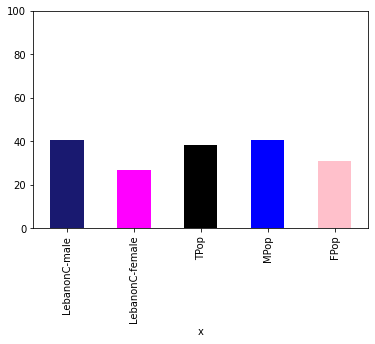

In [43]:
ax = pd.DataFrame({
    "x": ["LebanonC-male" , "LebanonC-female" , "TPop" , "MPop" , "FPop"],
    "y": [40.7, 26.9, 38.2, 40.7, 31.00]
}).plot.bar(x="x" , y="y", legend=False, color=['midnightblue', 'fuchsia', 'black', 'b', 'pink'])
ax.set_ylim(0, 100)

In [44]:
print("LEBANON")
MpopPredicted = 55869 * .454
print("MpopPredicted:")
print(MpopPredicted)
FpopPredicted = 55869 * .31
print("FpopPredicted:")
print(FpopPredicted)
LebanonCmale = 55869 * .407
print("LebanonCmale:")
print(LebanonCmale)
LebanonCfemale = 55869 * .269
print("LebanonCfemale:")
print(LebanonCfemale)

LEBANON
MpopPredicted:
25364.526
FpopPredicted:
17319.39
LebanonCmale:
22738.682999999997
LebanonCfemale:
15028.761


(0.0, 100.0)

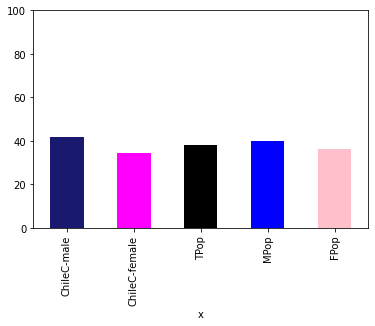

In [45]:
ax = pd.DataFrame({
    "x": ["ChileC-male" , "ChileC-female" , "TPop" , "MPop" , "FPop"],
    "y": [41.5, 34.2, 38.0, 40.0, 36.0]
}).plot.bar(x="x" , y="y", legend=False, color=['midnightblue', 'fuchsia', 'black', 'b', 'pink'])
ax.set_ylim(0, 100)

In [46]:
print("CHILE")
MpopPredicted = 484280 * .40
print("MpopPredicted:")
print(MpopPredicted)
FpopPredicted = 484280 * .36
print("FpopPredicted:")
print(FpopPredicted)
ChileCmale = 484280 * .415
print("ChileCmale:")
print(ChileCmale)
ChileCfemale = 484280 * .342
print("ChileCfemale:")
print(ChileCfemale)

CHILE
MpopPredicted:
193712.0
FpopPredicted:
174340.8
ChileCmale:
200976.19999999998
ChileCfemale:
165623.76


(0.0, 100.0)

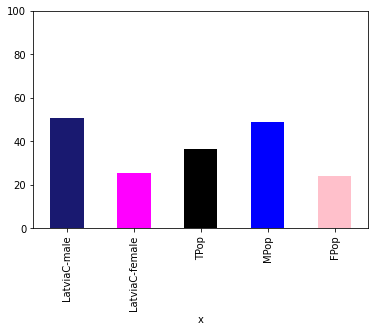

In [47]:
ax = pd.DataFrame({
    "x": ["LatviaC-male" , "LatviaC-female" , "TPop" , "MPop" , "FPop"],
    "y": [51.0, 25.6, 36.6, 48.9, 24.3]
}).plot.bar(x="x" , y="y", legend=False, color=['midnightblue', 'fuchsia', 'black', 'b', 'pink'])
ax.set_ylim(0, 100)

In [48]:
print("LATVIA")
MpopPredicted = 2840 * .489
print("MpopPredicted:")
print(MpopPredicted)
FpopPredicted = 2840 * .243
print("FpopPredicted:")
print(FpopPredicted)
LatviaCmale = 2840 * .510
print("LatviaCmale:")
print(LatviaCmale)
LatviaCfemale = 2840 * .256
print("LatviaCfemale:")
print(LatviaCfemale)

LATVIA
MpopPredicted:
1388.76
FpopPredicted:
690.12
LatviaCmale:
1448.4
LatviaCfemale:
727.04


(0.0, 100.0)

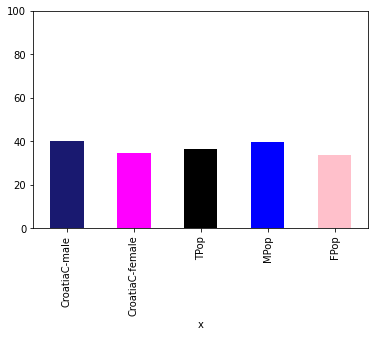

In [49]:
ax = pd.DataFrame({
    "x": ["CroatiaC-male" , "CroatiaC-female" , "TPop" , "MPop" , "FPop"],
    "y": [39.9, 34.3, 36.45, 39.4, 33.5]
}).plot.bar(x="x" , y="y", legend=False, color=['midnightblue', 'fuchsia', 'black', 'b', 'pink'])
ax.set_ylim(0, 100)

In [50]:
print("CROATIA")
MpopPredicted = 20993 * .394
print("MpopPredicted:")
print(MpopPredicted)
FpopPredicted = 20993 * .335
print("FpopPredicted:")
print(FpopPredicted)
CroatiaCmale = 20993 * .399
print("CroatiaCmale:")
print(CroatiaCmale)
CroatiaCfemale = 200993 * .343
print("CroatiaCfemale:")
print(CroatiaCfemale)

CROATIA
MpopPredicted:
8271.242
FpopPredicted:
7032.655000000001
CroatiaCmale:
8376.207
CroatiaCfemale:
68940.599
